# Project Business Statistics: Axis Insurance

**Marks: 60**

## Define Problem Statement and Objectives

Leveraging customer information is of paramount importance for most businesses. In the case of an insurance company, the attributes of customers can be crucial in making business decisions. Hence, knowing to explore and generate value out of such data can be an invaluable skill to have.

Suppose you are hired as a Data Scientist in an Insurance company. The company wants to have a detailed understanding of the customer base for one of its Insurance Policy 'MediClaim'. The idea is to generate insights about the customers and answer a few key questions with statistical evidence, by using the past dataset. The dataset 'AxisInsurance' contains customers' details like age, sex, charges, etc. Perform the statistical analysis to answer the following questions using the collected data.

Explore the dataset and extract insights using Exploratory Data Analysis.

Prove(or disprove) that the medical claims made by the people who smoke are greater than those who don't?

Prove (or disprove) with statistical evidence that the BMI of females is different from that of males.

Does the smoking habit of customers depend on their region? [Hint: Create a contingency table using the pandas.crosstab() function]

Is the mean BMI of women with no children, one child, and two children the same? Explain your answer with statistical evidence.

The idea behind answering these questions is to help the company in making evidence-based business decisions.

## Assumptions

The Health Insurance Customer's data is a simple random sample from the population data, and the samples are independent of each other.

# Data Dictionary

AxisInsurance.csv contains the following information about customers of Axis Health Insurance.

  1. Age - This is an integer indicating the age of the primary beneficiary (excluding those above 64 years, since they are generally covered by the government).
  2. Sex - This is the policy holder's gender, either male or female.
  3. BMI - This is the body mass index (BMI), which provides a sense of how over or under-weight a person is relative to their height. BMI is equal to weight (in kilograms) divided by height (in meters) squared. An ideal BMI is within the range of 18.5 to 24.9.
  4. Children - This is an integer indicating the number of children / dependents covered by the insurance plan.
  5. Smoker - This is yes or no depending on whether the insured person regularly smokes tobacco.
  6. Region - This is the beneficiary's place of residence in the U.S., divided into four geographic regions - northeast, southeast, southwest, or northwest.
  7. Charges - Individual medical costs billed by health insurance

## Import all the necessary libraries

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Library to help with statistical analysis
import scipy.stats as stats

In [ ]:
sns.set() #setting the default seaborn style for our plots

## 1.	Explore the dataset and extract insights using Exploratory Data Analysis. (8 + 6 = 14 Marks)

### Exploratory Data Analysis - Step by step approach

Typical Data exploration activity consists of the following steps:
1.	Importing Data
2.	Variable Identification
3.  Variable Transformation/Feature Creation
4.  Missing value detection
5.	Univariate Analysis
6.	Bivariate Analysis

### Reading the Data into a DataFrame

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read the dataset
df = pd.read_csv('/content/drive/My Drive/Project 2/AxisInsurance.csv')

### Data Overview
- View a few rows of the data frame.
- Check the shape and data types of the data frame. Add observations.
- Fix the data-types (if needed).
- Missing Value Check.
- Summary statistics from the data frame. Add observations.

In [ ]:
# read the dataset
df = pd.read_csv('/content/drive/My Drive/Project 2/AxisInsurance.csv')
# return the first 5 rows
df.head()

,age,sex,bmi,children,smoker,region,charges
0,21,female,16.000,1,no,northeast,3167.45585
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


* The DataFrame has 7 columns as mentioned in the Data Dictionary


### Checking the shape of the dataset

In [ ]:
# checking the shape of the data
print("There are", df.shape[0], 'rows and', df.shape[1], "columns.")

There are 1338 rows and 7 columns.


### Getting the statistical summary for the variables

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


* There are a total of 1338 non-null observations in each of the columns.

* There are 7 columns

* There are 7 columns named 'age', 'sex', 'BMI', 'children', 'smoker', 'region', and 'charges' whose data types are int64, object, float64, int64, object, object, float64 respectively.

* There are 4 numerical columns in the data and 3 object type columns.

* sex, smoker and region are objects

### Fixing the data types

converting "objects" to "category" reduces the space required to store the DataFrame. It also helps in the analysis

In [ ]:
df["sex"]=df["sex"].astype("category")
df["smoker"]=df["smoker"].astype("category")
df["region"]=df["region"].astype("category")

### Check for missing values

In [ ]:
# checking for missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

* There are no missing values in the data.

### Check for duplicates

In [ ]:
# Check for duplicates
duplicates = df.duplicated()

# Print the number of duplicates
print("Number of duplicates:", duplicates.sum())

# Print the duplicate rows
print("Duplicate rows:", df[duplicates])

Number of duplicates: 1
Duplicate rows:      age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631


In [ ]:
# Remove duplicate rows
df = df.drop_duplicates()

# Verify the removal by checking the number of duplicates again
duplicates = df.duplicated()
print("Number of duplicates:", duplicates.sum())


Number of duplicates: 0


### Statistical summary of the dataset

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.0000,27.000,39.0000,51.00000,64.00000
bmi,1337.0,30.682756,6.147973,14.0000,26.315,30.4000,34.70000,53.13000
children,1337.0,1.095737,1.205571,0.0000,0.000,1.0000,2.00000,5.00000
charges,1337.0,13279.121487,12110.359656,1121.8739,4746.344,9386.1613,16657.71745,63770.42801


### Getting the statistical summary for the categorical variables

In [ ]:
df.describe(include = ['object','category']).T

,count,unique,top,freq
sex,1338,2,male,676
smoker,1338,2,no,1064
region,1338,4,southeast,364


* Variables Sex, Smoker have only two categories
* There are four categories of the region by users, among which Southeast has been the most region by users

### Univariate analysis

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(data=data, x=feature, palette="Paired", order=data[feature].value_counts().index[:n].sort_values())

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(100 * p.get_height() / total)  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(label, (x, y), ha="center", va="center", size=12, xytext=(0, 5), textcoords="offset points")  # annotate the percentage

    plt.show()

### Age

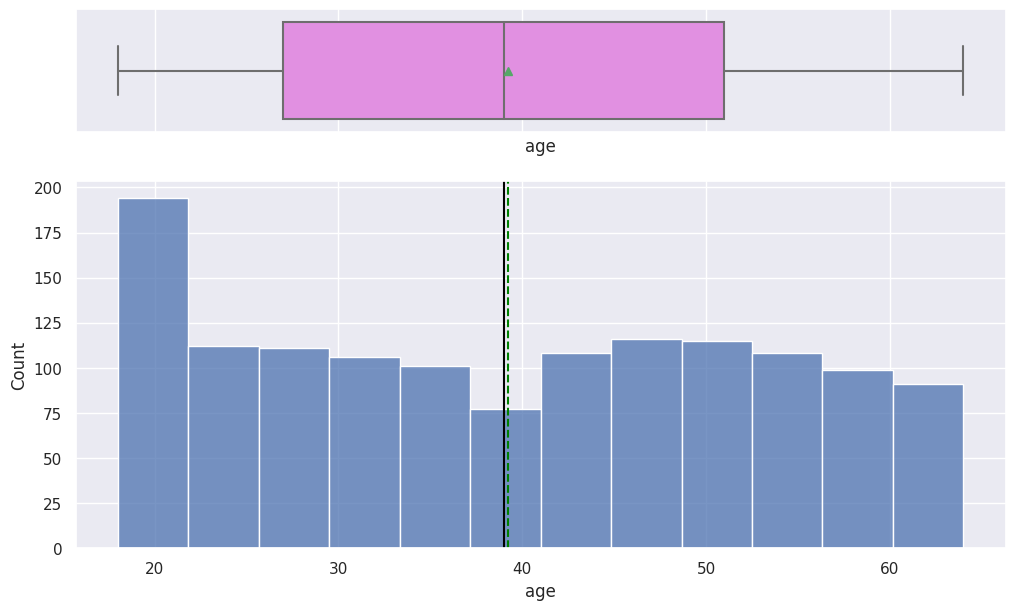

In [ ]:
# plotting the distribution of 'age'
histogram_boxplot(df,'age')

* The histogram and boxplot provide a visual summary of the 'age distribution, showing the median approximately age 40 and no outliers

### BMI

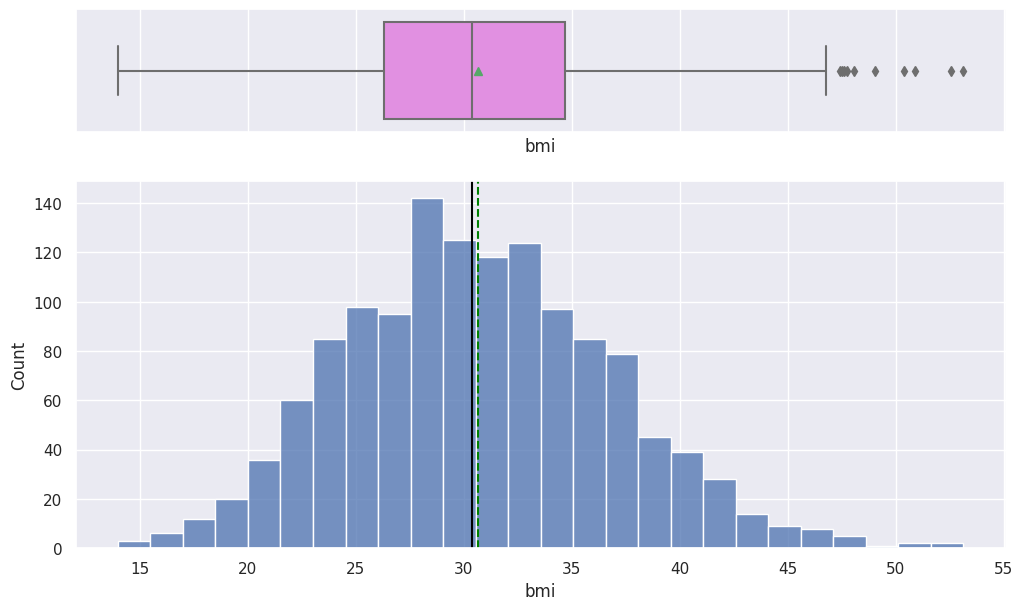

In [ ]:
# plotting the distribution of 'BMI'
histogram_boxplot(df,'bmi')

* The BMI are normal distribution
* The histogram and boxplot provide a visual summary of the 'BMI distribution, showing a median of approximately 30 with right-side outliers


### Children

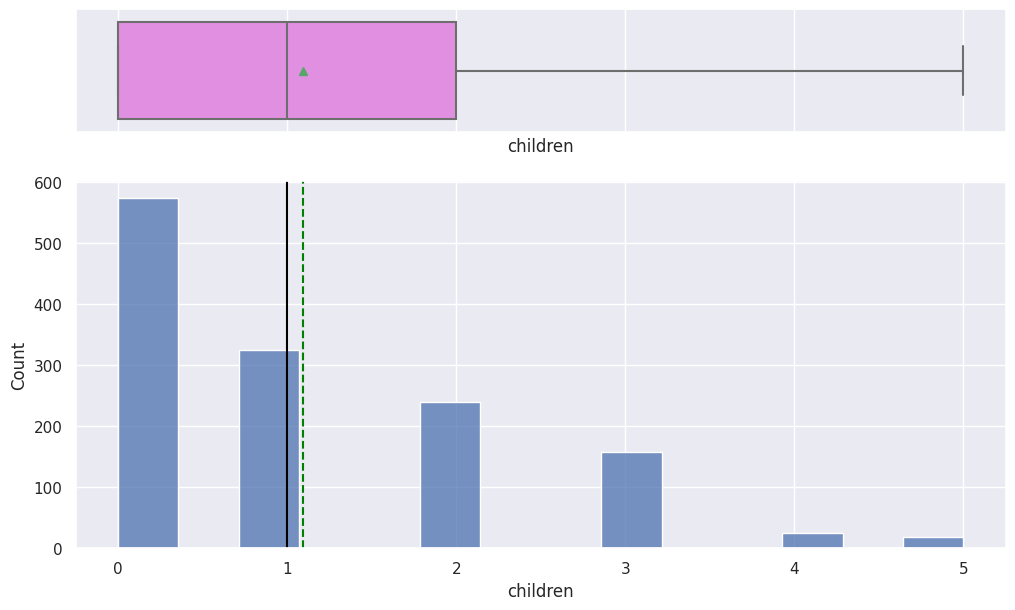

In [ ]:
# plotting the distribution of 'Children'
histogram_boxplot(df,'children')

* As there are only 5 unique values in children, we can also include them in the barplot of categorical variables.

### Charges

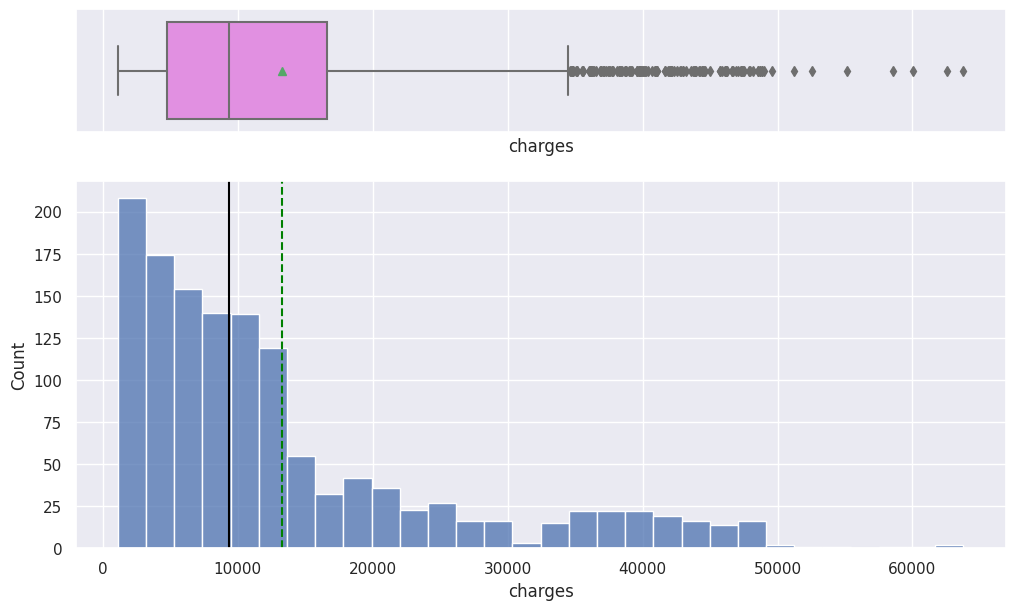

In [ ]:
# plotting the distribution of 'Charges'
histogram_boxplot(df,'charges')

* The distribution for the charges column is right-skewed with a median cost of 10,000
* The histogram and boxplot provide a visual summary of the charges distribution, showing the median, quartiles, and any outliers. The y-axis represents the charges, and the boxplot displays the interquartile range and right-skewed outliers.



### Sex

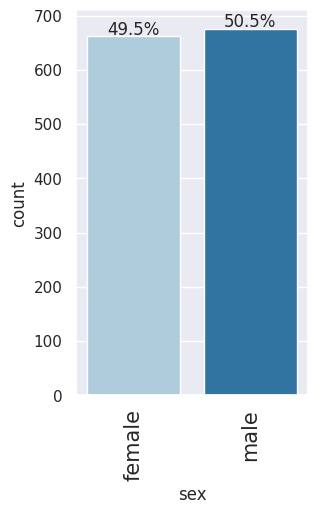

In [ ]:
# plotting the barplot of 'sex'
labeled_barplot(df, 'sex', perc=True)

* This is the barplot of the 'sex' variable, where each bar represents the percentage of males and females based on the total count.
* The percentage of males is higher than that of females

### Children

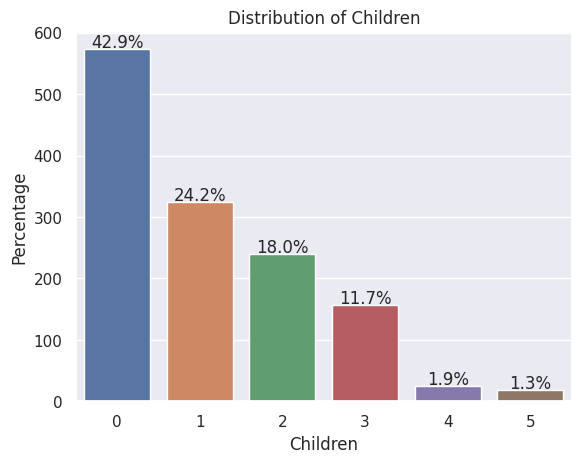

In [ ]:
def labeled_barplot(data, column, perc=False):
    sns.set(style="darkgrid")
    ax = sns.countplot(data=data, x=column)
    
    if perc:
        total = len(data[column])
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x() + p.get_width() / 2, height + 3, f'{height/total*100:.1f}%', ha="center")
    
    plt.xlabel(column.capitalize())
    plt.ylabel('Count' if not perc else 'Percentage')
    plt.title(f'Distribution of {column.capitalize()}')
    plt.show()

labeled_barplot(df, 'children', perc=True)

* The plot shows the distribution of the number of children with their percentages
* The highest percentage distribution of children is zero

### Smoker

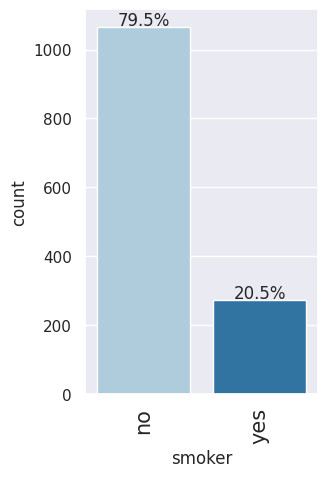

In [ ]:
# plotting the barplot of 'smoker'
labeled_barplot(df, 'smoker', perc=True)

*  This is the barplot of the 'smoker' variable, where each bar represents the percentage of smokers and non-smokers based on the total count.

### Region

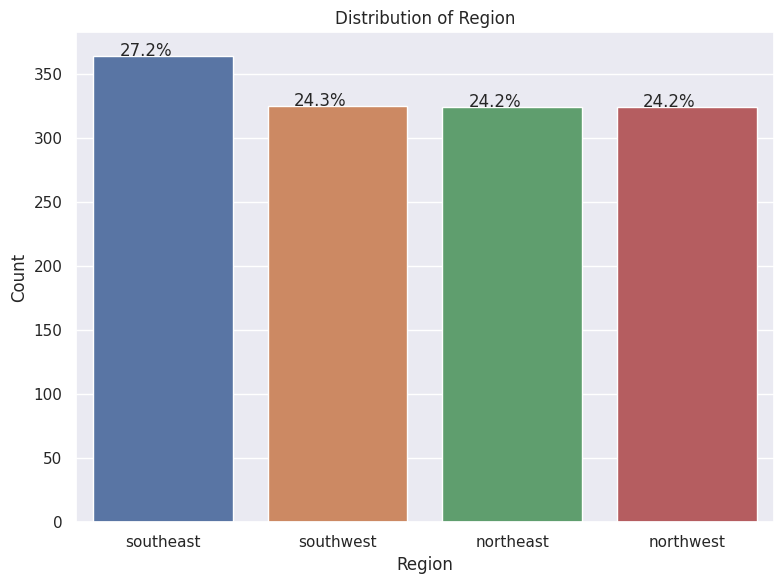

In [ ]:
def labeled_barplot(data, column, perc=False):
    plt.figure(figsize=(8, 6))
    if perc:
        total = len(data)
        ax = sns.countplot(data=data, x=column, order=data[column].value_counts().index)
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height() / total)
            x = p.get_x() + p.get_width() / 2 - 0.1
            y = p.get_height()
            ax.annotate(percentage, (x, y), ha='center')
    else:
        ax = sns.countplot(data=data, x=column, order=data[column].value_counts().index)

    plt.xlabel(column.capitalize())
    plt.ylabel('Count')
    plt.title(f'Distribution of {column.capitalize()}')

    plt.tight_layout()
    plt.show()

labeled_barplot(df, 'region', perc=True)


* Southeast has the highest percentage distribution of 27.2
* Southwest has 24.3 while Northeast and Northwest have the same percentages distributions of 24.2

### Bivariate Analysis

<ipython-input-41-6beb74020708>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='Spectral', vmin=-1, vmax=1)


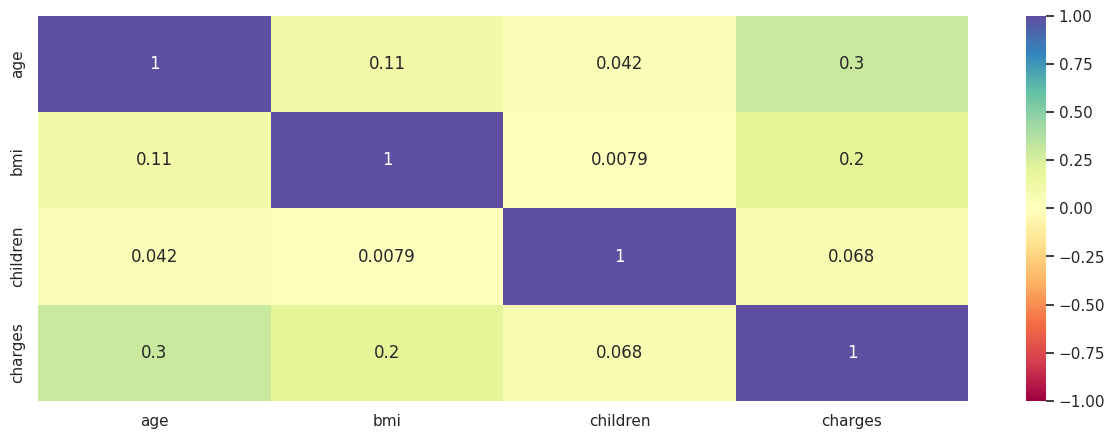

In [ ]:
# the code to plot the heatmap between the continuous variables
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(), annot=True, cmap='Spectral', vmin=-1, vmax=1) 
plt.show()

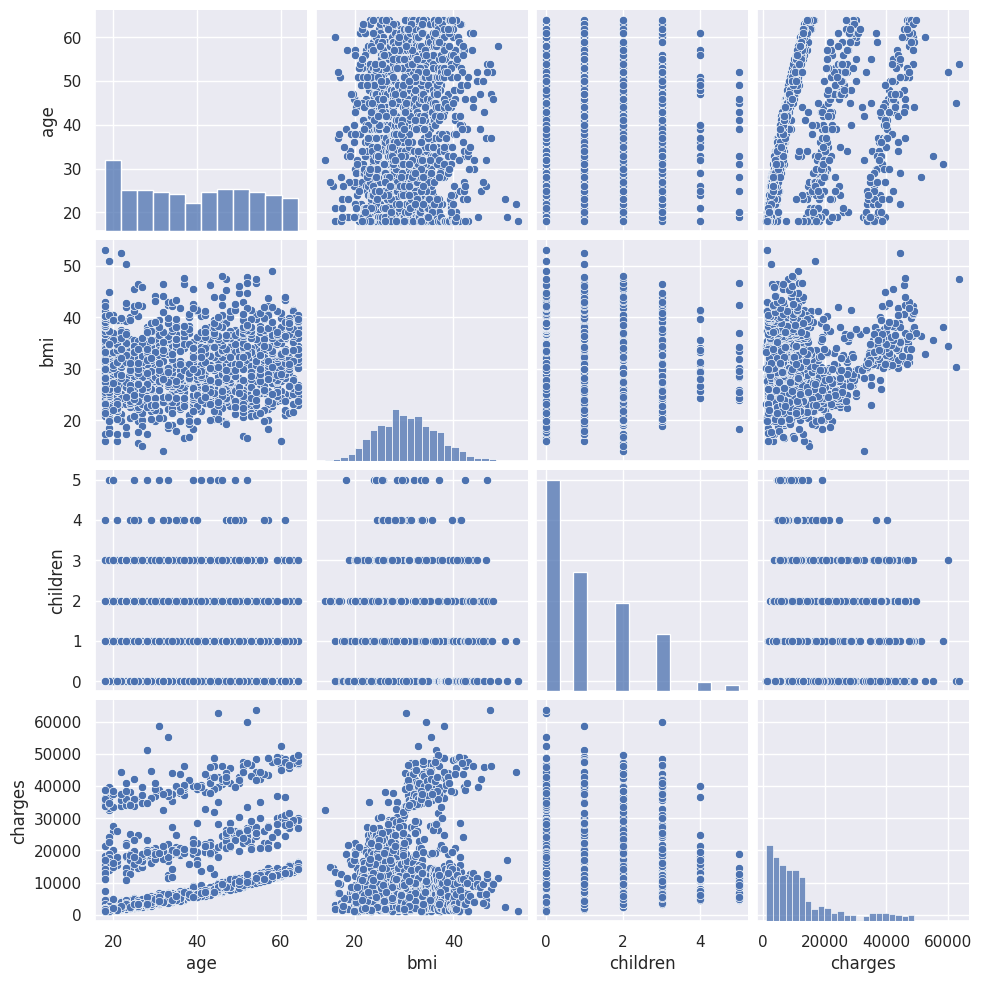

In [ ]:
# the code to plot the pairplot between all possible attributes' pair
sns.pairplot(df) 
plt.show()

* This pair plot visualizes the relationships between all possible attribute pairs in the dataset.
* This gives us insights into the data, identifying patterns, and exploring potential correlations between variables.

## 2. Prove(or disprove)  that the medical claims made by the people who smoke is greater than those who don't? 

### Perform Visual Analysis

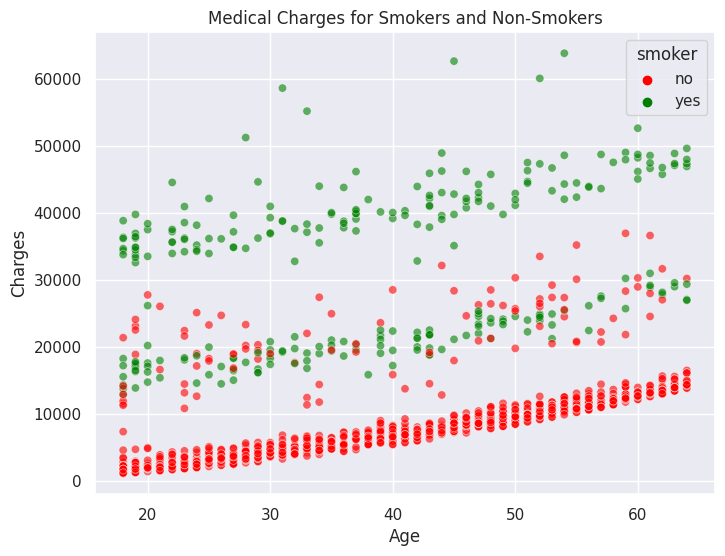

In [ ]:
# visual analysis of medical charges for smokers and non-smokers
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='charges', hue='smoker', data=df, palette=['red', 'green'], alpha=0.6)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Medical Charges for Smokers and Non-Smokers')
plt.show()

* This visualization helps us analyze any differences in charges between the two groups.

### Step 1: Define the null and alternate hypotheses

$H_0$: The average medical claims of smokers are equal to the average medical claims of non-smokers.

$H_a$: The average medical claims of smokers are greater than the average medical claims of non-smokers


### Step 2: Select Appropriate test

This is a one-tailed test concerning two population means from two independent populations. The population standard deviations are unknown, the two sample independent t-test will be the appropriate test for this problem.


### Step 3: Decide the significance level

As given in the problem statement, we select $\alpha = 0.05$.


### Step 4: Collect and prepare data

In [ ]:
# extract the values of charges for smokers
charges_smokers = df[df['smoker'] == 'yes']['charges']
# extract the values of charges for non-smokers
charges_non_smokers = df[df['smoker'] == 'no']['charges']

In [ ]:
print("The sample mean of the charges of smokers is:", round(charges_smokers.mean(), 2))
print("The sample mean of the charges of non-smokers is:", round(charges_non_smokers.mean(), 2))
print("The sample standard deviation of the charges of smokers is:", round(charges_smokers.std(), 2))
print("The sample standard deviation of the charges of non-smokers is:", round(charges_non_smokers.std(), 2))


The sample mean of the charges of smokers is: 32050.23
The sample mean of the charges of non-smokers is: 8440.66
The sample standard deviation of the charges of smokers is: 11541.55
The sample standard deviation of the charges of non-smokers is: 5992.97


* As the sample standard deviations are different, the population standard deviations may be assumed to be different.

### Step 5: Calculate the p-value

In [ ]:
from scipy.stats import ttest_ind

# Calculate the test statistic and p-value
test_stat, p_value = ttest_ind(charges_smokers, charges_non_smokers, equal_var = False, alternative = 'greater')

print('The p-value is', p_value)

The p-value is 3.1308603873638155e-103


### Step 6: Compare the p-value with $\alpha$

In [ ]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 3.1308603873638155e-103 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

Based on the provided p-value of 3.1308603873638155e-103, which is less than the level of significance of 5%, we reject the null hypothesis. This provides statistical evidence to support the alternative hypothesis, suggesting that the average medical claims of smokers are indeed greater than those of non-smokers.


**A similar approach can be followed to answer the other questions.**

## 3. Prove (or disprove) with statistical evidence that BMI of females is different from that of males.

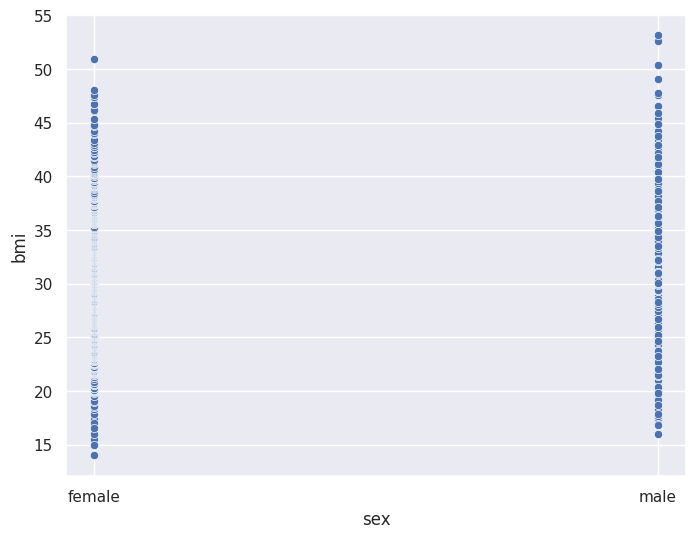

In [ ]:
#the code to visually compare the BMI of females and males
plt.figure(figsize=(8,6))
sns.scatterplot(x='sex', y='bmi', data=df)
plt.show()


### Step 1: Define the null and alternate hypotheses

$H_0$: The average BMI of females is equal to the average BMI of males.

$H_a$: The average BMI of females is different from the average BMI of males.

### Step 2: Select Appropriate test

This is a one-tailed test concerning two population means from two independent populations. The population standard deviations are unknown, the two-sample independent t-test will be the appropriate test for this problem.

### Step 3: Decide the significance level

As given in the problem statement, we select $\alpha = 0.05$.


### Step 4: Collect and prepare data

In [ ]:
# extract the values of BMI for females
bmi_females = df[df['sex'] == 'female']['bmi']

# extract the values of BMI for males
bmi_males = df[df['sex'] == 'male']['bmi']

In [ ]:
print("The sample mean of the BMI's of females is:", round(bmi_females.mean(),2))
print("The sample mean of the BMI's of males is:", round(bmi_males.mean(),2))
print("The sample standard deviation of the BMI's of females is:", round(bmi_females.std(),2))
print("The sample standard deviation of the BMI's of males is:", round(bmi_males.std(),2))

The sample mean of the BMI's of females is: 30.42
The sample mean of the BMI's of males is: 30.94
The sample standard deviation of the BMI's of females is: 6.14
The sample standard deviation of the BMI's of males is: 6.14


* Based on the sample standard deviations of the two groups, the population standard deviations can be assumed to be equal

### Step 5: Calculate the p-value

In [ ]:
# the code to import the required function
from scipy.stats import ttest_ind

# Calculate the test statistic and p-value
test_stat, p_value = ttest_ind(bmi_females, bmi_males)

print('The p-value is', p_value)


The p-value is 0.11719038246795971


### Step 6: Compare the p-value with $\alpha$

In [ ]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.11719038246795971 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7: Draw inference

Based on the provided p-value of 0.11719038246795971, which is greater than the level of significance of 5%, we fail to reject the null hypothesis. This suggests that there is not enough statistical evidence to conclude that the average BMI of females is different from the average BMI of males.

## 4. Does the smoking habit of customers depend on their region?


### Perform Visual Analysis

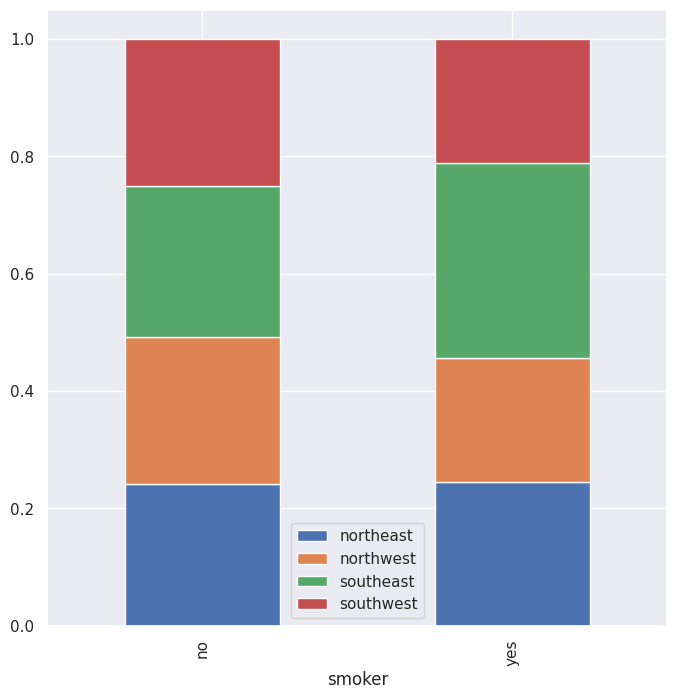

In [ ]:
# the code to plot a stacked bar plot between 'smoker and 'region'.
pd.crosstab(df['smoker'], df['region'], normalize='index').plot(kind="bar", figsize=(8, 8), stacked=True)
plt.legend()
plt.show()

* By observing the above plot, we can say that overall the number of customers who are smokers is more in southeast regions and also less in some regions. Let's perform a hypothesis test to see if there is enough statistical evidence for smokers in each region

### Step 1: Define the null and alternate hypotheses

$H_0$: The smoking habit of customers is independent of their region.

$H_a$: The smoking habit of customers is dependent on their region.

### Step 2: Select Appropriate test

This is a problem of the test of independence, concerning two categorical variables - smoker and region. Based on the information provided, the appropriate test for analyzing the relationship between two categorical variables (smoker and region) and determining their dependence or independence is the chi-square test of independence. 

### Step 3: Decide the significance level

As given in the problem statement, we select $\alpha = 0.05$.

### Step 4: Collect and prepare data

In [ ]:
# the code to create a contingency table showing the distribution of smokers across regions
contingency_table = pd.crosstab(df['smoker'], df['region'])
contingency_table


region,northeast,northwest,southeast,southwest
smoker,,,,
no,257,266,273,267
yes,67,58,91,58


* The table shows the counts of smokers and non-smokers for each region.

### Step 5: Calculate the p-value

In [ ]:
#the code to import the required function
from scipy.stats import chi2_contingency

chi2, p_value, dof, exp_freq = chi2_contingency(contingency_table)

print('The p-value is', p_value)


The p-value is 0.06354826573182332


### Step 6: Compare the p-value with $\alpha$

In [ ]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.06354826573182332 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7: Draw inference

based on the p-value of 0.06354826573182332, which is greater than the level of significance of 5%, we fail to reject the null hypothesis. This means that there is not enough evidence to conclude that the smoking habit of customers depends on their region.

## 5.	Is the mean BMI of women with no children, one child and two children the same? Explain your answer with statistical evidence.

### Perform Visual Analysis

In [ ]:
# create a new DataFrame for customers who are female and have 0,1, or 2 children
df_new = df[(df['sex']=='female') & (df['children']<3)]

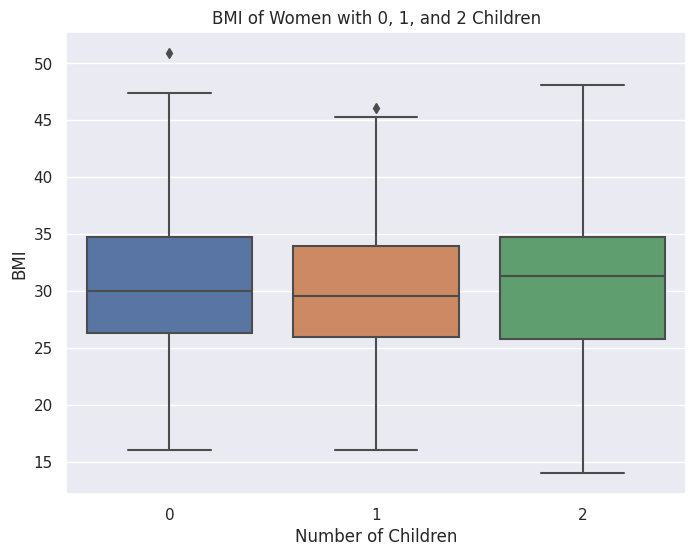

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='children', y='bmi', data=df_new[df_new['sex'] == 'female'])
plt.xlabel('Number of Children')
plt.ylabel('BMI')
plt.title("BMI of Women with 0, 1, and 2 Children")
plt.show()


In [ ]:
# the code to calculate the mean BMI of women with 0, 1, and 2 children
mean_bmi_no_children = df_new[df_new['children'] == 0]['bmi'].mean()
mean_bmi_one_child = df_new[df_new['children'] == 1]['bmi'].mean()
mean_bmi_two_children = df_new[df_new['children'] == 2]['bmi'].mean()

print("Mean BMI of women with 0 children:", mean_bmi_no_children)
print("Mean BMI of women with 1 child:", mean_bmi_one_child)
print("Mean BMI of women with 2 children:", mean_bmi_two_children)


Mean BMI of women with 0 children: 30.48550173010381
Mean BMI of women with 1 child: 30.047500000000007
Mean BMI of women with 2 children: 30.572436974789913


### Step 1: Define the null and alternate hypotheses

$H_0$: The mean BMI of women with 0 children, 1 child, and 2 children is equal.

$H_a$: At least one of the mean BMI values of the groups (0 children, 1 child, and 2 children) is different.

### Step 2: Select Appropriate *test*

This is a problem, concerning three population means. Based on this information, to compare the three population means of women with 0, 1, and 2 children, we can use a one-way analysis of variance ANOVA test. The ANOVA test allows us to determine if there is a significant difference in the means of multiple groups. It assesses whether the variation between the group means is greater than the variation within the groups.

* For testing normality, Shapiro-Wilk’s test is applied to the response variable.

* For equality of variance, the Levene test is applied to the response variable.

### Shapiro-Wilk’s test

We will test the null hypothesis

>$H_0:$ BMI of women follows a normal distribution

against the alternative hypothesis

>$H_a:$ BMI of women does not follow a normal distribution

In [ ]:
# Shapiro-Wilk's test for normality
# import the required function
from scipy.stats import shapiro

stat, p_value = stats.shapiro(df_new[df_new['children'] == 0]['bmi'])
print('p-value for women with 0 children:', p_value)

stat, p_value = stats.shapiro(df_new[df_new['children'] == 1]['bmi'])
print('p-value for women with 1 child:', p_value)

stat, p_value = stats.shapiro(df_new[df_new['children'] == 2]['bmi'])
print('p-value for women with 2 children:', p_value)


p-value for women with 0 children: 0.1558741331100464
p-value for women with 1 child: 0.6479359865188599
p-value for women with 2 children: 0.5636904239654541


* Since the p-value of the test is very larger than the 5% significance level, we fail to reject the null hypothesis that the response follows the normal distribution.

### Levene’s test

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [ ]:
# Assumption 2: Homogeneity of Variance
# use the levene function for this test
from scipy.stats import levene
# find the p-value
statistic, p_value = stats.levene(df_new[df_new['children']==0]['bmi'], 
                             df_new[df_new['children']==1]['bmi'], 
                             df_new[df_new['children']==2]['bmi'])

print('The p-value is', p_value)

The p-value is 0.33762398820932993


* Since the p-value is larger than the 5% significance level, we fail to reject the null hypothesis of homogeneity of variances.
* Based on the corrected p-value of 0.338, we do not have sufficient evidence to reject the null hypothesis of equal variances among the groups. Therefore, we can assume that the assumption of homogeneity of variance is satisfied for the three groups of women with 0, 1, and 2 children.

### Step 3: Decide the significance level

As given in the problem statement, we select $\alpha = 0.05$.

### Step 4: Collect and prepare data

In [ ]:
# extract the values of BMI of women with 0 children 
bmi_women_zero = df_new[df_new['children']==0]['bmi']
# extract the values of BMI of women with 1 child
bmi_women_one = df_new[df_new['children']==1]['bmi']
# extract the values of BMI of women with 2 children
bmi_women_two = df_new[df_new['children']==2]['bmi']

### Step 5: Calculate the p-*value*

In [ ]:
# the code to import the required function
from scipy.stats import f_oneway

# Perform one-way ANOVA
test_stat, p_value = f_oneway(bmi_women_zero, bmi_women_one, bmi_women_two)

print('The p-value is', p_value)


The p-value is 0.7200129592186635


### Step 6: Compare the p-value with $\alpha$

In [ ]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.7200129592186635 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7: Draw inference

The p-value of 0.7200129592186635 is greater than the level of significance of 5%, indicating that we fail to reject the null hypothesis. Therefore, we do not have enough statistical evidence to conclude that the mean BMI of women with 0, 1, and 2 children is significantly different.

## Conclusion and Business Recommendations

## Based on the statistical analysis conducted, we can conclude the following:

* Medical claims made by smokers are significantly greater than those made by non-smokers. There is strong evidence to support this claim, as the p-value was found to be extremely low.

* There is no significant difference in the mean BMI of women with 0, 1, and 2 children. The p-value obtained from the analysis suggests that we fail to reject the null hypothesis, indicating that the mean BMI of women in these groups is not significantly different.

* Encourage smoking cessation programs and initiatives targeting smokers, as they tend to have higher medical claims. These programs can help individuals quit smoking and potentially reduce their healthcare expenses.

* While region does not seem to be a significant factor in smoking habits, it is still important to continue monitoring and analyzing smoking patterns in different regions. This can help identify any emerging trends or patterns and inform targeted interventions if necessary.